<a href="https://colab.research.google.com/github/AIWalaBro/Complete_Machine_Learning/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


***************************************************************************************************************************
[27.88324518]
-2.8729961198731173


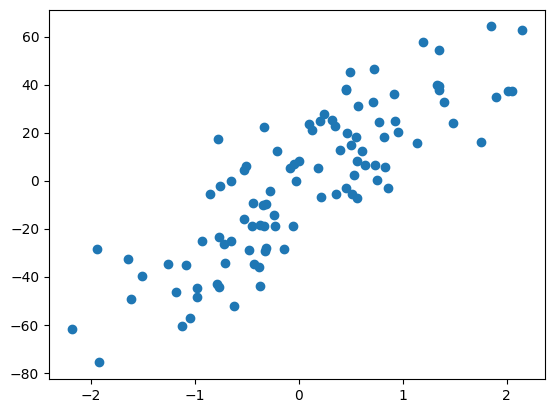

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(X_train, y_train)
# print(lr.predict(y_test, y_pred))
print('*'*123)
print(lr.coef_)
print(lr.intercept_)

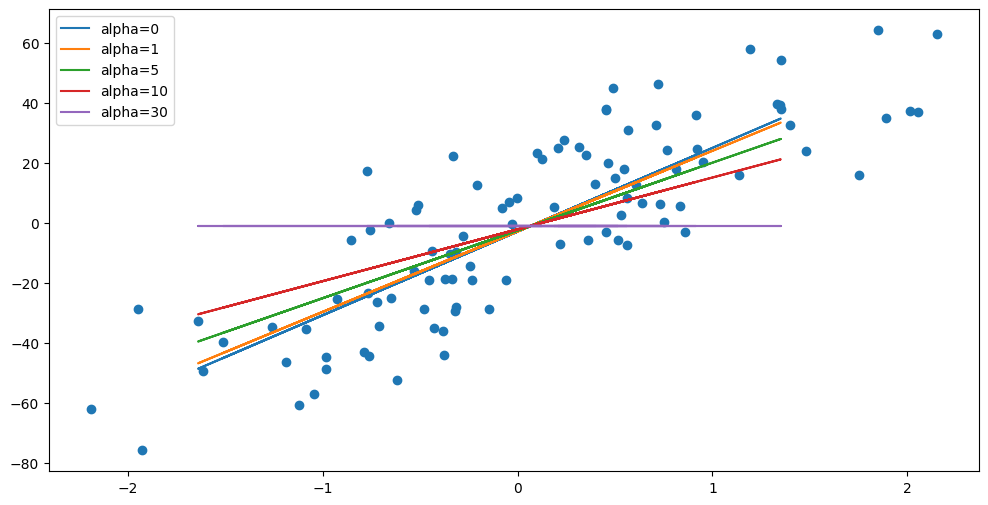

In [ ]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)

for i in alphas:
  L = Lasso(alpha = i)
  L.fit(X_train, y_train)
  plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()


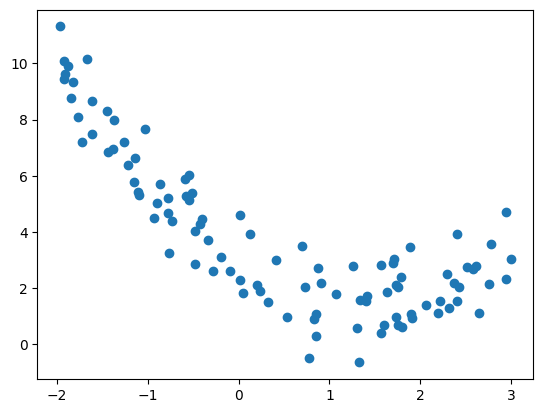

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

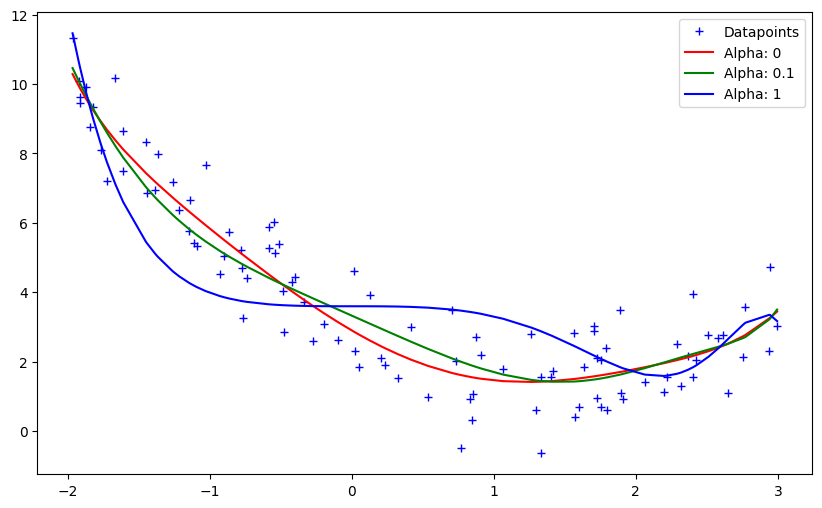

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import  PolynomialFeatures

def get_preds_lasso(x1, x2, alpha):
  model = Pipeline([
      ('poly features', PolynomialFeatures(degree = 16)),
      ('lasso', Lasso(alpha = alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha,c in zip(alphas,cs):
  preds = get_preds_lasso(x1, x2, alpha)
  plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])],c, label='Alpha: {}'.format(alpha))


plt.legend()
plt.show()
